In [7]:
global cont_solitario, cont_jugadores, cont_juegos, modo_juego, num_intentos, nome_jogador
import openpyxl
import random

cont_juegos = 0
cont_solitario = 0
cont_jugadores = 0
num_intentos = 0
human_victories = 0
jug_1_victories = 0 
jug_2_victories = 0
machine_victories = 0
soli_facil = 0
soli_medio = 0
soli_dificil = 0
contra_facil = 0
contra_medio = 0
contra_dificil = 0

############################ Definiciones iniciales#########################################

def definiciones():
    global modo_juego, num_intentos
    
    
    #if cont_juegos == 0:
        #nome_jogador = input("Digite o seu nome: ")
        
    print()
    print("Elija la forma de juego:")
    print("1. Partida modo solitario")
    print("2. Partida 2 Jugadores")
    print("3. Estadística")
    print("4. Salir")


    modo_juego = 0
    while True:
        modo_juego = input()
        if modo_juego.isdigit() and int(modo_juego) >= 1 and int(modo_juego) <= 4:
            break
        else:
            print("Opción inválida, elija un número del 1 al 4")
            
############################ Elije Nivel ##########################################

def nivel ():
    global modo_juego, num_intentos, nivel_juego
    print("1. Fácil (20 intentos)")
    print("2. Medio (12 intentos)")
    print("3. Difícil (5 intentos)")

    nivel_juego = 0
    while True:
        nivel_juego = input()
        if nivel_juego.isdigit() and int(nivel_juego) >= 1 and int(nivel_juego) <= 3:
            break
        else:
            print("Opción inválida, elija un número del 1 al 3")

    if int(nivel_juego) == 1:
                num_intentos = 20
    elif int(nivel_juego) == 2:
                num_intentos = 12
    elif int(nivel_juego) == 3:
                num_intentos = 5
            
############################ Estadística ##########################################

def estad ():
    print(f"  Total de partidas:{cont_juegos}")
    print()
    print(f"Partidas contra la máquina:{cont_solitario}")
    print(f"   Nível")
    print(f"     Fácil:{soli_facil}")
    print(f"     Medio:{soli_medio}")
    print(f"     Dificil:{soli_dificil}")
    print(f"   Victorias de la máquina: {machine_victories}")
    print(f"   Victorias humanas: {human_victories}")
    print()
    print(f"Partidas contra otro jugador:{cont_jugadores}")
    print(f"     Fácil:{contra_facil}")
    print(f"     Medio:{contra_medio}")
    print(f"     Dificil:{contra_dificil}")
    print(f"   Victorias del jogador 1: {jug_1_victories}")
    print(f"   Victorias del jogador 2: {jug_2_victories}")
            
    
while True:
    definiciones()
           
############################ MODO SOLITÁRIO ##########################################

    if int(modo_juego) == 1:
        cont_solitario += 1
    
        workbook = openpyxl.load_workbook('c:\\ejerciciospython\\tarea.xlsx')
        Hoja = workbook['juego']
        #ws = workbook.active
        
        ######## verifica si el nombre esta en la lista #####################
        
        if cont_juegos == 0:
                while True:
                    nome_encontrado = False
                    nome = input('Ingrese su nombre: ')
                    for i in Hoja.iter_rows(min_row=2, max_col=2,values_only=True):
                        if i[0] == nome:
                            print(f'Bienvenido de vuelta, {nome}!')
                            nome_encontrado = True
                            break


                    if not nome_encontrado:
                        print()
                        print(f'Olá, {nome}!')
                        Hoja.append([nome, 1, 0, 0, 0, 0])
                        workbook.save('c:\\ejerciciospython\\tarea.xlsx')
                        break

                    break
        ####################################################################
        
        print()
        print("Elija el nivel:")
        nivel ()
        if int(nivel_juego) == 1:
                 soli_facil += 1
        elif int(nivel_juego) == 2:
                soli_medio += 1
        elif int(nivel_juego) == 3:
                soli_dificil += 1
                               
        import random 
        numero = random.randint(1, 1000)
        
        for i in range(num_intentos):
            if i == 0:
                print()
                print("Intente adivinar el número entre 1 y 1000")
            if i <num_intentos-1:
                print()
                print("Intento",i+1,"/",num_intentos)
            
            intento = 0
            
            while True:
                intento = input()
                if intento.isdigit() and int(intento) >=1 and int(intento) <=1000:
                    break
                else:
                    print("Opción inválida, elija un número del 1 al 1000")
                    
            ##### mensaje e contador de victorias #######
            int(intento)
            if int(intento) == numero:
                print("¡Encontró el número!!!")
                human_victories += 1
                
                for i in Hoja.iter_rows(min_row=2, max_col=5):
                    if i[0].value == nome:
                        i[1].value += 1
                        i[2].value += 1
                        i[4].value += 1
                        workbook.save('c:\\ejerciciospython\\tarea.xlsx')
                break
            ##############################################    
            
            if int(intento) < numero and i <num_intentos-1:
                print("El número es mayor")
            if int(intento) > numero and i <num_intentos-1:
                print("El número es menor")
            if i == num_intentos-2:
                print()
                print("ÚLTIMO INTENTO")
                
            ##### mensaje e contador de derrotas #######
            if i == num_intentos-1:
                machine_victories += 1
                print()
                print("No se encontró el número =(")
                print("El número buscado era",numero)
                
                for i in Hoja.iter_rows(min_row=2, max_col=5):
                    if i[0].value == nome:
                        i[1].value += 1
                        i[3].value += 1
                        i[4].value += 1
                        workbook.save('c:\\ejerciciospython\\tarea.xlsx')
                break
            ############################################## 
            
################################################## MODO CONTRA ##############################################################
#############################################################################################################################

    if int(modo_juego) == 2:
        
        workbook = openpyxl.load_workbook('c:\\ejerciciospython\\tarea.xlsx')
        Hoja = workbook['juego']
                                
        ######## verifica si el nombre esta en la lista #####################
        
        if cont_juegos == 0:
                while True:
                    nome_encontrado = False
                    nome = input('Ingrese su nombre: ')
                    for i in Hoja.iter_rows(min_row=2, max_col=2,values_only=True):
                        if i[0] == nome:
                            print(f'Bienvenido de vuelta, {nome}!')
                            nome_encontrado = True
                            break


                    if not nome_encontrado:
                        print()
                        print(f'Olá, {nome}!')
                        Hoja.append([nome, 1, 0, 0])
                        workbook.save('c:\\ejerciciospython\\tarea.xlsx')
                        break

                    break
        ####################################################################
        
        
        cont_jugadores += 1
        print()
        print("Desafiante ingrese un número entre 1 y 1000: ")

        import getpass
        
        numero = 0
        while numero <1 or numero >1000:
                #numero = int(input())
                numero = int(getpass.getpass())
                if numero <1 or numero >1000:
                    print("Número inválido")
                
        print(f'{nome}, elige el nivel de dificultad:')     
        nivel ()
        if int(nivel_juego) == 1:
                 contra_facil += 1
        elif int(nivel_juego) == 2:
                contra_medio += 1
        elif int(nivel_juego) == 3:
                contra_dificil += 1
        intento = 0
        for i in range(num_intentos):
            if i == 0:
                print()
                print(f'{nome}, Intenta adivinar el número entre 1 y 1000')
            if i <num_intentos-1:
                print("Intento",i+1,"/",num_intentos)
          
            while True:
                intento = input()
                if intento.isdigit() and int(intento) >1 and int(intento) <1000:
                    break
                else:
                    print("Opción inválida, elija un número del 1 al 1000")
            
            if int(intento) == numero:
                print()
                print("¡Encontró el número!!!")
                jug_2_victories += 1
                for i in Hoja.iter_rows(min_row=2, max_col=6):
                    if i[0].value == nome:
                        i[1].value += 1
                        i[2].value += 1
                        i[5].value += 1
                        workbook.save('c:\\ejerciciospython\\tarea.xlsx')
                #break
                break
            if int(intento) < numero and i <num_intentos-1:
                print("El número es mayor")
            if int(intento) > numero and i <num_intentos-1:
                print("El número es menor")
                
            ##### mensaje e contador de derrotas #######
            if i == num_intentos-1:
                jug_1_victories += 1
                print()
                print("No se encontró el número =(")
                print("El número buscado era",numero)
                
                for i in Hoja.iter_rows(min_row=2, max_col=6):
                    if i[0].value == nome:
                        i[1].value += 1
                        i[3].value += 1
                        i[5].value += 1
                        workbook.save('c:\\ejerciciospython\\tarea.xlsx')
                break
             ############################################   
                
            if i == num_intentos-2:
                print()
                print("ÚLTIMO INTENTO")
                
################################# ESTADISTICA ############################################
    if int(modo_juego) == 3:
        estad ()
################################ SALIR ###################################################
    if int(modo_juego) == 4:
         break
################################# nuevo juego #############################################
    cont_juegos += 1
    while True:
        print()
        novo_jogo = input("Desea jugar de nuevo? s/n")
        if novo_jogo.lower() != "s" and novo_jogo.lower() != "n":
            print("Opición inválida")
        else:
            break
        
    if novo_jogo.lower() != "s":
        break
    
    print()

#########################################################################################
print()        
print("Gracias, hasta la próxima")
print()
#estad ()



Elija la forma de juego:
1. Partida modo solitario
2. Partida 2 Jugadores
3. Estadística
4. Salir


KeyboardInterrupt: Interrupted by user

In [10]:
import getpass
numero = 0
while True: 
    numero = getpass.getpass("Desafiante ingrese un número entre 1 y 1000: ")
    if numero.isdigit() and int(numero) >=1 and int(numero) <=1000:
        break                
    else:
        print("Número inválido")

Desafiante ingrese un número entre 1 y 1000: ········
Número inválido
Desafiante ingrese un número entre 1 y 1000: ········
Número inválido
Desafiante ingrese un número entre 1 y 1000: ········


<function matplotlib.pyplot.show(close=None, block=None)>

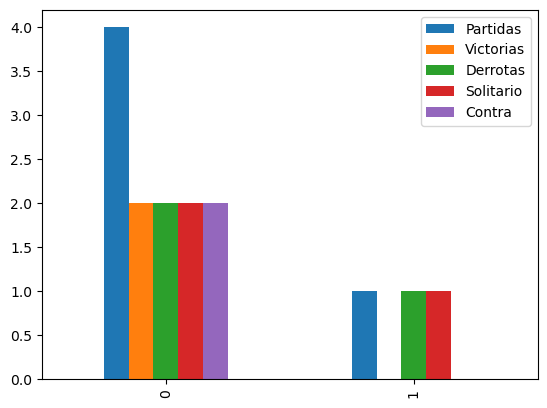

In [11]:
    import pandas as pd
    import matplotlib.pyplot as plt
    
    df = pd.read_excel('c:\\ejerciciospython\\tarea.xlsx')
    
    df.plot(kind='bar')
    plt.show

In [12]:
def estad ():
    import pandas as pd
    import matplotlib.pyplot as plt
    
    df = pd.read_excel('c:\\ejerciciospython\\tarea.xlsx')
    
    df.plot(kind='bar')
    plt.show

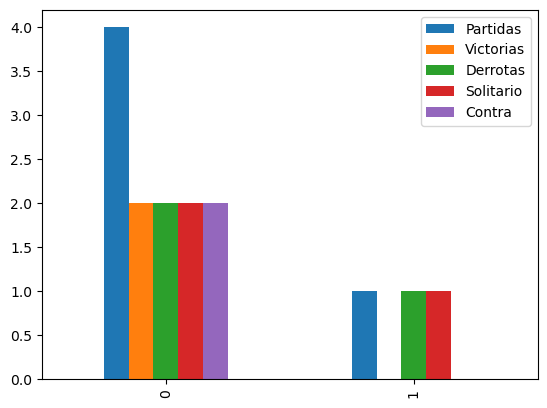

In [13]:
estad ()

In [15]:

    import pandas as pd
    import matplotlib.pyplot as plt
    
    df = pd.read_excel('c:\\ejerciciospython\\tarea.xlsx')
    
    
    plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('c:\\ejerciciospython\\tarea.xlsx')

print(df)

    Nome  Partidas  Victorias  Derrotas  Solitario  Contra
0  Maria         4          2         2          2       2
1      1         1          0         1          1       0


In [19]:
import pandas as pd

# Carrega a planilha em um objeto DataFrame
df = pd.read_excel('c:\\ejerciciospython\\tarea.xlsx')

# Solicita ao usuário que digite o nome a ser pesquisado
nome_pesquisa = input("Digite o nome que deseja pesquisar: ")

# Filtra o DataFrame para encontrar a linha correspondente ao nome digitado
linha = df.loc[df['Nome'] == nome_pesquisa]

# Exibe a linha correspondente ao nome digitado
print(linha)


Digite o nome que deseja pesquisar: Maria
    Nome  Partidas jugadas  Victorias  Derrotas  Modo Solitario  Modo Contra
0  Maria                 4          2         2               2            2


In [21]:
    elije_estad = 0
    while True:
        elije_estad = input("1 - Pesquisar nombro / 2 - Mostrar todos los resultados")
        if elije_estad.isdigit() and int(elije_estad) >= 1 and int(elije_estad) <= 2:
            break
        else:
            print("Opción inválida")

1 - Pesquisar nombro / 2 - Mostrar todos los resultados1


In [25]:
def estad ():
    
    import pandas as pd
    import matplotlib.pyplot as plt
    
    elije_estad = 0
    while True:
        elije_estad = input("1 - Pesquisar nombre / 2 - Mostrar todos los resultados")
        if elije_estad.isdigit() and int(elije_estad) >= 1 and int(elije_estad) <= 2:
            break
        else:
            print("Opción inválida")
            
    if elije_estad == 1:
        df = pd.read_excel('c:\\ejerciciospython\\tarea.xlsx')
        nome_pesquisa = input("Digite o nome que deseja pesquisar: ")
        linha = df.loc[df['Nome'] == nome_pesquisa]
        print(linha)

    else:
        df = pd.read_excel('c:\\ejerciciospython\\tarea.xlsx')

        print(df)